In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import os

In [3]:
path = "./PCBData/defects"

In [4]:
datagenAug = ImageDataGenerator(
    rotation_range=90,
	zoom_range=0.15,
	horizontal_flip=True,
	vertical_flip=True,
	validation_split=0.2
)

In [5]:
trainGen = datagenAug.flow_from_directory(
    path, 
    classes=["open", "short", "mousebit", 
             "spur", "copper", "pin-hole"],
    target_size=(224, 224), 
    color_mode='grayscale',
    class_mode="sparse",
    batch_size=32, 
    subset="training")

testGen = datagenAug.flow_from_directory(
    path, 
    classes=["open", "short", "mousebit", 
             "spur", "copper", "pin-hole"],
    target_size=(224, 224), 
    color_mode='grayscale',
    class_mode="sparse",
    batch_size=32, 
    subset="validation")


Found 8012 images belonging to 6 classes.
Found 2001 images belonging to 6 classes.


In [6]:
trainGen.image_shape

(224, 224, 1)

In [7]:
trainGen.classes

array([0, 0, 0, ..., 5, 5, 5])

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import cv2 as cv
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# from sklearn.model_selection import train_test_split

In [14]:
del model

In [15]:
model = Sequential()

In [16]:
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(224,224,1)))
model.add(MaxPooling2D(2))
model.add(Conv2D(64, kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(6, activation='softmax'))

c:\ProgramData\anaconda3\envs\PCB_CNN\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 224, 224, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │   102,760,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102,782,854 (392.09 MB)

 Trainable params: 102,782,854 (392.09 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [20]:
checkpoint = ModelCheckpoint('./model/not_use_vgg16.keras',
                             monitor='val_accuracy', 
                             verbose=1, 
                             save_best_only=True, 
                             save_weights_only=False)
early_stopping = EarlyStopping(monitor='val_accuracy',
                      patience=5, 
                      verbose=1)

In [21]:
history = model.fit(trainGen,
                    epochs=50,
                    validation_data=testGen,
                    callbacks=[checkpoint, early_stopping])

Epoch 1/50


c:\ProgramData\anaconda3\envs\PCB_CNN\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5213 - loss: 456.2214
Epoch 1: val_accuracy improved from -inf to 0.89955, saving model to ./model/not_use_vgg16.keras
251/251 ━━━━━━━━━━━━━━━━━━━━ 311s 1s/step - accuracy: 0.5220 - loss: 454.8193 - val_accuracy: 0.8996 - val_loss: 0.3015
Epoch 2/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8514 - loss: 0.4326
Epoch 2: val_accuracy improved from 0.89955 to 0.95252, saving model to ./model/not_use_vgg16.keras
251/251 ━━━━━━━━━━━━━━━━━━━━ 277s 1s/step - accuracy: 0.8514 - loss: 0.4325 - val_accuracy: 0.9525 - val_loss: 0.1507
Epoch 3/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9041 - loss: 0.3162
Epoch 3: val_accuracy improved from 0.95252 to 0.96102, saving model to ./model/not_use_vgg16.keras
251/251 ━━━━━━━━━━━━━━━━━━━━ 277s 1s/step - accuracy: 0.9041 - loss: 0.3162 - val_accuracy: 0.9610 - val_loss: 0.1138
Epoch 4/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9101 - loss: 0.2797
Epoch 4: val_acc

In [22]:
history.history

{'accuracy': [0.683599591255188,
  0.8696954846382141,
  0.9062656164169312,
  0.9153769612312317,
  0.9212431311607361,
  0.933599591255188,
  0.9259859919548035,
  0.9327259063720703,
  0.9352221488952637,
  0.9405891299247742,
  0.9221168160438538,
  0.929480791091919,
  0.9338492155075073,
  0.9360958337783813,
  0.9459560513496399,
  0.9449575543403625,
  0.949201226234436,
  0.9475786089897156,
  0.9488267302513123,
  0.9513230323791504,
  0.9509485960006714,
  0.9474537968635559,
  0.9546929597854614,
  0.9514478445053101,
  0.9594358205795288,
  0.9576884508132935,
  0.9591861963272095,
  0.9574388265609741],
 'loss': [102.90755462646484,
  0.38886746764183044,
  0.30063596367836,
  0.26599961519241333,
  0.2525382339954376,
  0.22391706705093384,
  0.22993753850460052,
  0.2185792326927185,
  0.22049058973789215,
  0.19573092460632324,
  0.6020544171333313,
  0.2302921861410141,
  0.21502627432346344,
  0.20595501363277435,
  0.17908546328544617,
  0.1775268167257309,
  0.1777

In [24]:
import numpy as np

In [31]:
print(np.max(history.history["accuracy"]))
print(np.max(history.history["val_accuracy"]))


0.9594358205795288
0.9905047416687012


In [32]:
print(np.min(history.history["loss"]))
print(np.min(history.history["val_loss"]))

0.13344751298427582
0.03660937026143074


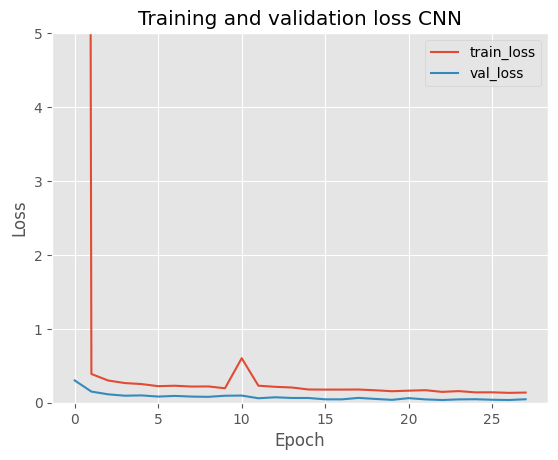

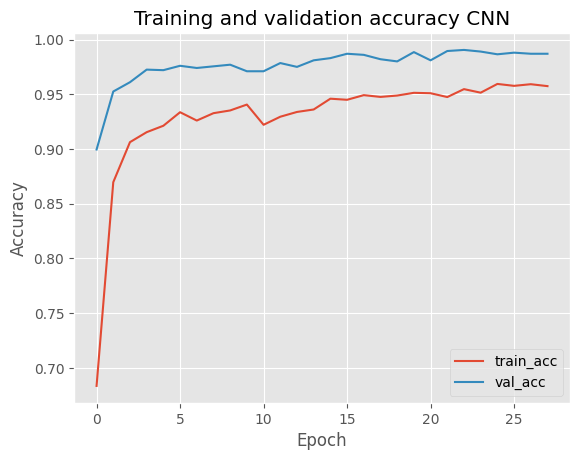

In [28]:
N = np.arange(0, len(history.history["loss"]))

plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.title("Training and validation loss CNN")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.ylim(0, 5)
plt.legend()

plt.figure()
plt.plot(N, history.history["accuracy"], label="train_acc")
plt.plot(N, history.history["val_accuracy"], label="val_acc")
plt.title("Training and validation accuracy CNN")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

In [33]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import cv2
import itertools

In [46]:
import tensorflow as tf

In [47]:
model = tf.keras.models.load_model('./model/not_use_vgg16.keras')

In [49]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 224, 224, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │   102,760,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 308,348,564 (1.15 GB)

 Trainable params: 102,782,854 (392.09 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 205,565,710 (784.17 MB)

In [59]:
image = cv2.imread('./PCBData/defects/copper/defect_00041000_4.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (224, 224))
print(image.shape)
# image = np.expand_dims(image, axis=0)
cv2.imshow('img', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

(224, 224)


In [50]:
predictions = list()
for path in testGen.filepaths:
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (224, 224))
    image = np.expand_dims(image, axis=0)
    preds = model.predict(image)
    predictions.append(preds.argmax(axis=1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━

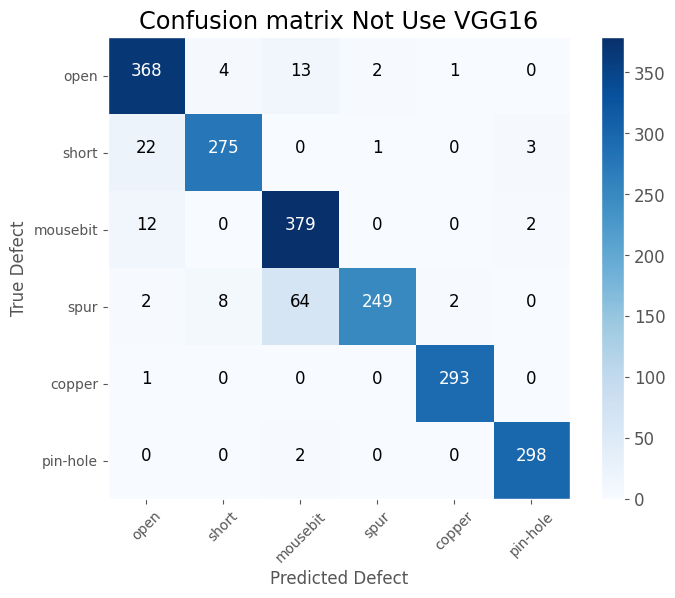

In [60]:
plt.style.use("ggplot")
plt.grid(False)
plt.rcParams["figure.figsize"] = (8,6)
font = {'size' : 12}
plt.rc('font', **font)

cm = confusion_matrix(testGen.classes, predictions)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(testGen.class_indices))

plt.xticks(tick_marks, testGen.class_indices, rotation=45)
plt.yticks(tick_marks, testGen.class_indices)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Defect')
plt.ylabel('True Defect')
plt.title('Confusion matrix Not Use VGG16')
# plt.savefig('output/vgg_confusion_matrix.png')
plt.show()

In [52]:
(368 + 275 + 379 + 249 + 293 + 298) + (4 + 13 + 2 + 1 + 0 + 22 + 1 + 3 + 12 + 2 + 2 + 8 + 64 + 2 + 1 + 2)

2001

In [53]:
(368 + 275 + 379 + 249 + 293 + 298)

1862

In [54]:
1862 / 2001

0.9305347326336831